In [373]:
#pip install yfinance
import talib as ta
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
#Yahoo Finance Library
import yfinance as yf
import numpy as np

# ElasticNet Application

In [13]:
#Functions available
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [333]:
#Download data from Yahoo Finance
data=yf.download('BTC-USD', start='2017-09-28', end='2021-07-01')

[*********************100%***********************]  1 of 1 completed


In [334]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-28,4197.129883,4279.310059,4109.700195,4174.729980,4174.729980,1712320000
2017-09-29,4171.620117,4214.629883,4039.290039,4163.069824,4163.069824,1367049984
2017-09-30,4166.109863,4358.430176,4160.859863,4338.709961,4338.709961,1207449984
2017-10-01,4341.049805,4403.740234,4269.810059,4403.740234,4403.740234,1208210048
2017-10-02,4395.810059,4470.229980,4377.459961,4409.319824,4409.319824,1431730048


### Technical Analysis Library Indicators

In [335]:
# Momentum Indicator Functions
data['AROONOSC']=ta.AROONOSC(data['High'],data['Low'],timeperiod=6)
data['RSI'] = ta.RSI(data['Close'],timeperiod=6)
data['RSI1'] = ta.RSI(data['Close'],timeperiod=7)
data['DX']=ta.DX(data['High'],data['Low'],data['Close'],timeperiod=2)

In [336]:
# Volume Indicator Functions
data['AD']=ta.AD(data['High'],data['Low'],data['Close'],data['Volume'])
data['OBV']=ta.OBV(data['Close'],data['Volume'])

In [337]:
# Volatility  Indicator Functions
data['ATR']=ta.ATR(data['High'],data['Low'],data['Close'],timeperiod=6)
data['NATR']=ta.NATR(data['High'],data['Low'],data['Close'],timeperiod=14)
data['TRANGE']=ta.ATR(data['High'],data['Low'],data['Close'])

In [338]:
# Pattern Recognition Functions
data['CDLENGULFING']=ta.CDLENGULFING(data['Open'],data['High'],data['Low'],data['Close'])/100
data['CDLHANGINGMAN']=ta.CDLHANGINGMAN(data['Open'],data['High'],data['Low'],data['Close'])/100
data['CDLSHOOTINGSTAR']=ta.CDLSHOOTINGSTAR(data['Open'],data['High'],data['Low'],data['Close'])/100
data['CDLHAMMER']=ta.CDLHAMMER(data['Open'],data['High'],data['Low'],data['Close'])/100

In [500]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,AROONOSC,RSI,RSI1,DX,AD,OBV,ATR,NATR,TRANGE,CDLENGULFING,CDLHANGINGMAN,CDLSHOOTINGSTAR,CDLHAMMER
Date,,,,,,,,,,,,,,,,,,,
2017-09-28,4197.129883,4279.310059,4109.700195,4174.729980,4174.729980,1712320000,NaN,NaN,NaN,NaN,-3.992855e+08,1.712320e+09,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2017-09-29,4171.620117,4214.629883,4039.290039,4163.069824,4163.069824,1367049984,NaN,NaN,NaN,NaN,1.637809e+08,3.452700e+08,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2017-09-30,4166.109863,4358.430176,4160.859863,4338.709961,4338.709961,1207449984,NaN,NaN,NaN,60.665897,1.130191e+09,1.552720e+09,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2017-10-01,4341.049805,4403.740234,4269.810059,4403.740234,4403.740234,1208210048,NaN,NaN,NaN,73.885942,2.338401e+09,2.760930e+09,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2017-10-02,4395.810059,4470.229980,4377.459961,4409.319824,4409.319824,1431730048,NaN,NaN,NaN,86.853585,1.890065e+09,4.192660e+09,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [342]:
#Create Lagged Series, 1 day
data_lagged = data.copy() 
trailing_window_size = 1
for window in range(1, trailing_window_size +1): 
    shifted= data.shift(window) 
    shifted.columns = [x + "_lag" + str(window) for x in data.columns] 
    data_lagged = pd.concat((data_lagged, shifted), axis=1) 
#Get rid off the NaN
data_lagged = data_lagged.dropna()
data_lagged.head()

,Open,High,Low,Close,Adj Close,Volume,AROONOSC,RSI,RSI1,DX,...,DX_lag1,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-13,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3615480064,100.000000,96.443426,95.086632,98.942339,...,97.635023,5.757130e+09,1.382015e+10,245.291755,3.627589,197.591518,0.0,0.0,0.0,0.0
2017-10-14,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1669030016,83.333333,97.065831,95.869436,98.942339,...,98.942339,5.911893e+09,1.743563e+10,271.651413,3.759302,212.295674,0.0,0.0,0.0,0.0
2017-10-15,5835.959961,5852.479980,5478.609863,5678.189941,5678.189941,1976039936,100.000000,82.626459,83.027013,21.654208,...,98.942339,7.500746e+09,1.910466e+10,267.386188,3.681673,214.707416,0.0,0.0,0.0,0.0
2017-10-16,5687.569824,5776.229980,5544.209961,5725.589844,5725.589844,2008070016,66.666667,83.533546,83.807925,21.654208,...,21.654208,7.634413e+09,1.712862e+10,285.133509,3.981483,226.076180,0.0,0.0,0.0,0.0
2017-10-17,5741.580078,5800.350098,5472.720215,5605.509766,5605.509766,1821570048,66.666667,72.091136,73.775696,38.647305,...,21.654208,8.765930e+09,1.913669e+10,276.281261,3.955937,226.500740,0.0,0.0,0.0,0.0


In [501]:
#Scale Data
sc_x = StandardScaler() 
data_scaled = pd.DataFrame(sc_x.fit_transform(data_lagged), index=data_lagged.index, columns=data_lagged.columns)
data_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,AROONOSC,RSI,RSI1,DX,...,DX_lag1,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-13,-0.609634,-0.591848,-0.602712,-0.597295,-0.597295,-0.903280,1.344000,2.152534,2.210766,1.053318,...,1.009059,-0.898040,-0.981391,-0.540105,-0.561928,-0.596830,-0.03621,0.139923,0.102214,-0.191712
2017-10-14,-0.596448,-0.592033,-0.590864,-0.583732,-0.583732,-0.992313,1.100128,2.183420,2.251933,1.053318,...,1.051837,-0.897897,-0.975774,-0.515933,-0.513524,-0.582666,-0.03621,0.139923,0.102214,-0.191712
2017-10-15,-0.582302,-0.590981,-0.599516,-0.595019,-0.595019,-0.978270,1.344000,1.466882,1.576556,-1.476036,...,1.051837,-0.896427,-0.973181,-0.519844,-0.542052,-0.580343,-0.03621,0.139923,0.102214,-0.191712
2017-10-16,-0.593211,-0.596409,-0.594494,-0.591536,-0.591536,-0.976805,0.856255,1.511895,1.617624,-1.476036,...,-1.477130,-0.896304,-0.976251,-0.503570,-0.431875,-0.569392,-0.03621,0.139923,0.102214,-0.191712
2017-10-17,-0.589240,-0.594692,-0.599966,-0.600359,-0.600359,-0.985336,0.856255,0.944077,1.090034,-0.919915,...,-1.477130,-0.895257,-0.973132,-0.511687,-0.441263,-0.568983,-0.03621,0.139923,0.102214,-0.191712


In [528]:
#Split the Data in training and testing sets
from sklearn.model_selection import train_test_split 
y = data_scaled[['Close']]
X = data_scaled[['AROONOSC_lag1','RSI_lag1','RSI1_lag1','DX_lag1','AD_lag1','OBV_lag1','ATR_lag1','NATR_lag1','TRANGE_lag1','CDLENGULFING_lag1','CDLHANGINGMAN_lag1','CDLSHOOTINGSTAR_lag1','CDLHAMMER_lag1']]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### ElasticNet Regression

In [348]:
from sklearn.linear_model import ElasticNet

In [532]:
model = ElasticNet(alpha=0.02, l1_ratio=0.4,normalize=False)
model.fit(X_train, y_train)

In [430]:
#Coefficients for each variable
coef = list(model.coef_)
count = 0
for i in X.columns:
    print(i,':',coef[count])
    count+= 1

AROONOSC_lag1 : 0.01708201876387056
RSI_lag1 : 0.010501340397327724
RSI1_lag1 : 0.007301349044954181
DX_lag1 : 0.0006158766710875342
AD_lag1 : 0.07481596890692925
OBV_lag1 : 0.26303118196794495
ATR_lag1 : 0.0
NATR_lag1 : -0.15069405943397834
TRANGE_lag1 : 0.7312234070936355
CDLENGULFING_lag1 : -0.003583222425329628
CDLHANGINGMAN_lag1 : 0.0
CDLSHOOTINGSTAR_lag1 : -0.0
CDLHAMMER_lag1 : -0.0


In [504]:
#Forecast Values of BTC
BTC_fitted= X.dot(coef)
BTC_fitted.tail()

Date
2021-06-27    1.922199
2021-06-28    1.973357
2021-06-29    1.902682
2021-06-30    1.919305
2021-07-01    1.852486
dtype: float64

In [432]:
#Actual Values of BTC (scaled)
BTC_actual=data_scaled[['Close']]
BTC_actual.tail()

,Close
Date,
2021-06-27,1.533786
2021-06-28,1.517965
2021-06-29,1.623294
2021-06-30,1.562531
2021-07-01,1.454610


Text(0.5, 0, 'DATE')

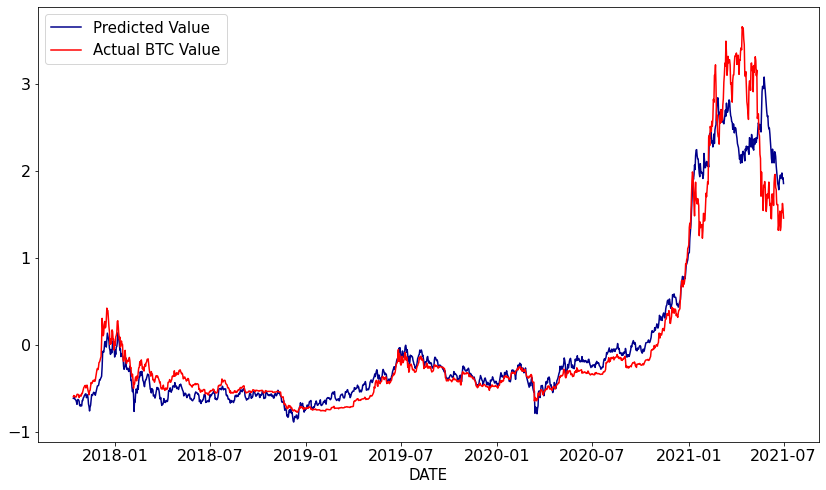

In [481]:
#Comparisson of BTC actual values and predicted values
plt.figure(figsize=(14, 8))
plt.plot(data_scaled.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(data_scaled.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=15))
plt.xlabel('DATE', fontsize=15)

### Mean Squared Error

In [509]:
y=BTC_actual
X=BTC_fitted

In [510]:
y=y.values.reshape(-1,1)
X=X.values.reshape(-1,1)

In [511]:
#Mean Squared Error
SR= np.square(X-y)
MSE= np.sum(SR)/len(data)
MSE

0.07050027810552596